In [29]:
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
#from pyclustering.samples.definitions import FCPS_SAMPLES
#from pyclustering.utils import read_sample;
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

import numpy as np # linear algebra

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
import pandas as pd

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

In [3]:
import scipy.io
lsun = scipy.io.loadmat('FCPS/Lsun.mat')
atom = scipy.io.loadmat('FCPS/Atom.mat')
chain = scipy.io.loadmat('FCPS/Chainlink.mat')
engy = scipy.io.loadmat('FCPS/EngyTime.mat')
hepta = scipy.io.loadmat('FCPS/Hepta.mat')
target = scipy.io.loadmat('FCPS/Target.mat')
tetra = scipy.io.loadmat('FCPS/Tetra.mat')
lsun = scipy.io.loadmat('FCPS/Lsun.mat')
twoDiamons = scipy.io.loadmat('FCPS/TwoDiamonds.mat')
wingNut = scipy.io.loadmat('FCPS/WingNut.mat')

In [4]:
isomap = Isomap(n_components=2).fit_transform(atom['fea'])
pca = PCA(n_components=2).fit_transform(atom['fea'])
mds = MDS(n_components=2).fit_transform(atom['fea'])
lle = LocallyLinearEmbedding(n_components=2,eigen_solver='dense').fit_transform(atom['fea'])
eigen = method = LocallyLinearEmbedding(n_components=2,  n_neighbors=20, method='hessian', eigen_solver='dense').fit_transform(atom['fea'])

In [ ]:
atom_scaled = minmax_scale(atom['fea'], axis = 0)

input_dim = Input(shape = (3, ))
encoded1 = Dense(2, activation = 'relu')(input_dim)
decoded1 = Dense(3, activation = 'sigmoid')(encoded1)

autoencoder = Model(inputs = input_dim, outputs = decoded1)

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

#autoencoder.summary()

autoencoder.fit(atom_scaled, atom_scaled, epochs = 10, batch_size = 20, shuffle = False)
encoder = Model(inputs = input_dim, outputs = encoded1)

encoded_train = pd.DataFrame(encoder.predict(atom_s))
encoded_train = encoded_train.add_prefix('feature_')

In [51]:
atom_scaled = minmax_scale(atom['fea'], axis = 0)
m = Sequential()
m.add(Dense(2,  activation='elu', input_shape=(3,), name="bottleneck"))
m.add(Dense(3,  activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = Adam())

history = m.fit(atom_scaled, atom_scaled, batch_size=80, epochs=40, verbose=1, 
                validation_data=(atom_scaled, atom_scaled))

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(atom_scaled)  # bottleneck representation
Renc = m.predict(atom_scaled)        # reconstruction

Train on 800 samples, validate on 800 samples
Epoch 1/40
800/800 [==============================] - 0s 198us/step - loss: 0.0620 - val_loss: 0.0612
Epoch 2/40
800/800 [==============================] - 0s 57us/step - loss: 0.0605 - val_loss: 0.0597
Epoch 3/40
800/800 [==============================] - 0s 44us/step - loss: 0.0592 - val_loss: 0.0585
Epoch 4/40
800/800 [==============================] - 0s 40us/step - loss: 0.0580 - val_loss: 0.0574
Epoch 5/40
800/800 [==============================] - 0s 35us/step - loss: 0.0570 - val_loss: 0.0565
Epoch 6/40
800/800 [==============================] - 0s 39us/step - loss: 0.0561 - val_loss: 0.0557
Epoch 7/40
800/800 [==============================] - 0s 33us/step - loss: 0.0553 - val_loss: 0.0549
Epoch 8/40
800/800 [==============================] - 0s 32us/step - loss: 0.0546 - val_loss: 0.0542
Epoch 9/40
800/800 [==============================] - 0s 35us/step - loss: 0.0539 - val_loss: 0.0536
Epoch 10/40
800/800 [=======================

Text(0.5, 1.0, 'Deep AE on Atom')

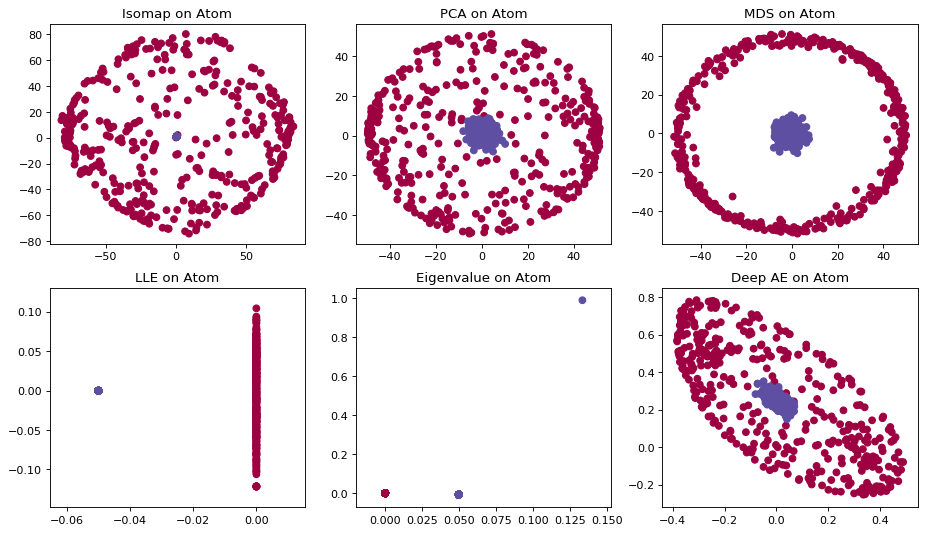

In [52]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = atom['gnd'][:,0]
## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Atom')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Atom')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Atom')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Atom')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Atom')
##
subplot(2, 3, 6)
#scatter(encoded_train.feature_0, encoded_train.feature_1, c=color, cmap=plt.cm.Spectral)
scatter(Zenc[:,0], Zenc[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Atom')